# Regression

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

## Prepare data

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
data = pd.read_csv('~/Desktop/finaldata.csv').drop(columns = ['Unnamed: 0'])

In [4]:
data.head()

,STATE,Year,CO2,CH4,N2O,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone,Question,DataValue,StratificationCategory1,Stratification1,Population,Total Sq. Mi.,Total Sq. Km.
0,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Mortality from diseases of the heart,234.8,Gender,Female,4815588,52420.0,"135,767"
1,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,14.9,Gender,Female,4815588,52420.0,"135,767"
2,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,8.6,Gender,Male,4815588,52420.0,"135,767"
3,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,8.9,Race/Ethnicity,"White, non-Hispanic",4815588,52420.0,"135,767"
4,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,21.8,Race/Ethnicity,"Black, non-Hispanic",4815588,52420.0,"135,767"


In [5]:
data['CO2_PER_POP'] = data['CO2'] / data['Population']
data['CO2_PER_SQUARE'] = data['CO2'] / data['Total Sq. Mi.']
data['CH4_PER_POP'] = data['CH4'] / data['Population']
data['CH4_PER_SQUARE'] = data['CH4'] / data['Total Sq. Mi.']
data['N2O_PER_POP'] = data['N2O'] / data['Population']
data['N2O_PER_SQUARE'] = data['N2O'] / data['Total Sq. Mi.']
data['Fluorinated GHG_PER_POP'] = data['Fluorinated GHG'] / data['Population']
data['Fluorinated GHG_PER_SQUARE'] = data['Fluorinated GHG'] / data['Total Sq. Mi.']

In [6]:
data.drop(['STATE', 'Year','CO2','CH4','N2O','Fluorinated GHG_PER_POP','Population','Total Sq. Mi.','Total Sq. Km.'], axis=1, inplace=True)

In [7]:
data = data[~data['StratificationCategory1'].isnull()]
cols = data.columns.tolist()
cols = cols[6:] + cols[:6]
data = data[cols]

In [8]:
data['Question'].unique()

array(['Mortality from diseases of the heart', 'Asthma mortality rate',
       'Mortality from heart failure',
       'Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years',
       'Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years',
       'Mortality from coronary heart disease',
       'Premature mortality among adults aged 45-64 years',
       'Mortality from total cardiovascular diseases',
       'Invasive cancer (all sites combined), incidence',
       'Cancer of the lung and bronchus, incidence'], dtype=object)

In [9]:
data['StratificationCategory1'].unique()

array(['Gender', 'Race/Ethnicity', 'Overall'], dtype=object)

In [10]:
data.head()

,DataValue,StratificationCategory1,Stratification1,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone,Question
0,234.8,Gender,Female,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,264437,3,7,4,0.044215,Mortality from diseases of the heart
1,14.9,Gender,Female,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,264437,3,7,4,0.044215,Asthma mortality rate
2,8.6,Gender,Male,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,264437,3,7,4,0.044215,Asthma mortality rate
3,8.9,Race/Ethnicity,"White, non-Hispanic",17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,264437,3,7,4,0.044215,Asthma mortality rate
4,21.8,Race/Ethnicity,"Black, non-Hispanic",17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,264437,3,7,4,0.044215,Asthma mortality rate


In [11]:
data.shape

(22416, 16)

In [12]:
data.isnull().sum()

DataValue                     5297
StratificationCategory1          0
Stratification1                  0
CO2_PER_POP                      0
CO2_PER_SQUARE                   0
CH4_PER_POP                      0
CH4_PER_SQUARE                   0
N2O_PER_POP                      0
N2O_PER_SQUARE                   0
Fluorinated GHG_PER_SQUARE       0
Fluorinated GHG                  0
Laws and Regulations             0
State Incentives                 0
Utility/Private Incentives       0
Ozone                            0
Question                         0
dtype: int64

## Questions

- Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years

- Mortality from heart failure

- Mortality from coronary heart disease

### 1. Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years

In [13]:
data_q1 = data[data['Question']=='Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years']

In [14]:
data_q1[data_q1['StratificationCategory1']=='Race/Ethnicity'].isnull().sum()

DataValue                     805
StratificationCategory1         0
Stratification1                 0
CO2_PER_POP                     0
CO2_PER_SQUARE                  0
CH4_PER_POP                     0
CH4_PER_SQUARE                  0
N2O_PER_POP                     0
N2O_PER_SQUARE                  0
Fluorinated GHG_PER_SQUARE      0
Fluorinated GHG                 0
Laws and Regulations            0
State Incentives                0
Utility/Private Incentives      0
Ozone                           0
Question                        0
dtype: int64

In [15]:
data_q1[data_q1['StratificationCategory1']=='Gender'].isnull().sum()

DataValue                     0
StratificationCategory1       0
Stratification1               0
CO2_PER_POP                   0
CO2_PER_SQUARE                0
CH4_PER_POP                   0
CH4_PER_SQUARE                0
N2O_PER_POP                   0
N2O_PER_SQUARE                0
Fluorinated GHG_PER_SQUARE    0
Fluorinated GHG               0
Laws and Regulations          0
State Incentives              0
Utility/Private Incentives    0
Ozone                         0
Question                      0
dtype: int64

In [16]:
data_q1_1 = data_q1[data_q1['StratificationCategory1']=='Race/Ethnicity']
data_q1_1.drop(['Question','StratificationCategory1'], axis=1, inplace=True)
data_q1_1 = data_q1_1[~data_q1_1['DataValue'].isnull()]

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
data_q1_1.head()

,DataValue,Stratification1,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
51,56.9,"Black, non-Hispanic",17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
53,179.4,"White, non-Hispanic",17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
82,178.7,"White, non-Hispanic",17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
94,64.3,"Black, non-Hispanic",17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
139,176.8,"White, non-Hispanic",17.523932,1618.606543,0.130945,12.094792,0.108513,10.022873,5.955761,312201,3,7,4,0.040936


In [18]:
data_q1_2 = data_q1[data_q1['StratificationCategory1']=='Gender']
data_q1_2.drop(['Question','StratificationCategory1'], axis=1, inplace=True)

In [19]:
data_q1_2.head()

,DataValue,Stratification1,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
35,159.5,Male,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
45,136.8,Female,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
86,165.1,Male,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
88,133.7,Female,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
153,135.3,Female,17.523932,1618.606543,0.130945,12.094792,0.108513,10.022873,5.955761,312201,3,7,4,0.040936


#### Label_encoding

In [20]:
data_q1_1.rename(columns={'Stratification1':'Race'}, inplace=True)
data_q1_1 = pd.get_dummies(data_q1_1, columns = ['Race'], drop_first = True)

In [21]:
data_q1_1.head()

,DataValue,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone,Race_Asian or Pacific Islander,"Race_Black, non-Hispanic",Race_Hispanic,"Race_White, non-Hispanic"
51,56.9,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215,0,1,0,0
53,179.4,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215,0,0,0,1
82,178.7,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733,0,0,0,1
94,64.3,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733,0,1,0,0
139,176.8,17.523932,1618.606543,0.130945,12.094792,0.108513,10.022873,5.955761,312201,3,7,4,0.040936,0,0,0,1


Encode male by 1, female by 0

In [22]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_q1_2['Stratification1'] = label_encoder.fit_transform(data_q1_2['Stratification1'])
data_q1_2.rename(columns={'Stratification1':'Male'}, inplace=True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [23]:
data_q1_2.head()

,DataValue,Male,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
35,159.5,1,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
45,136.8,0,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
86,165.1,1,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
88,133.7,0,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
153,135.3,0,17.523932,1618.606543,0.130945,12.094792,0.108513,10.022873,5.955761,312201,3,7,4,0.040936


### Regression

### Race

In [24]:
X = data_q1_1.values[:,1:].copy()
y = data_q1_1.DataValue.values

#### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

nmc = 100

#Linear Regression
linreg = LinearRegression()
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(linreg, X, y, cv=cvf,return_train_score=True)
print('---- linear regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- linear regression ----
0.7658131677258686
0.7516677203218066


#### Random forest regression

In [26]:
#Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[7],'max_depth':[25],'n_estimators':[50]}
# set up cross-validation shuffles
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
# set up search
grid_search=GridSearchCV(RandomForestRegressor(random_state=25),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)

print('---- random forest ----')
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])
print('---- optimal parameters ----')
print(grid_search.best_params_)
print('---- best accuracy ----')
print(grid_search.best_score_)

---- random forest ----
   rank_test_score  mean_test_score param_max_features param_max_depth
0                1         0.931463                  7              25
---- optimal parameters ----
{'max_depth': 25, 'max_features': 7, 'n_estimators': 50}
---- best accuracy ----
0.9314632662871816


#### Gradient Boosting Regression

In [27]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.946
Accuracy on test set: 0.869


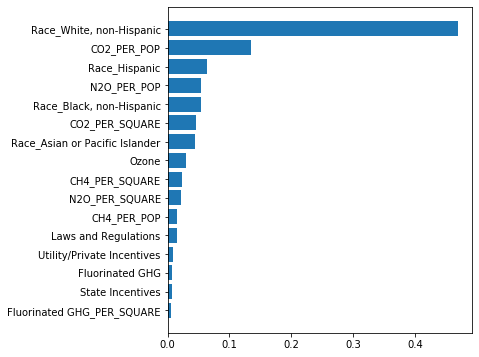

In [28]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data_q1_1.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

### Gender

In [29]:
X = data_q1_2.values[:,1:].copy()
y = data_q1_2.DataValue.values

#### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

nmc = 100

#Linear Regression
linreg = LinearRegression()
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(linreg, X, y, cv=cvf,return_train_score=True)
print('---- linear regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- linear regression ----
0.4318237399168424
0.38354205337507835


#### Random forest regression

In [31]:
#Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[7],'max_depth':[25],'n_estimators':[50]}
# set up cross-validation shuffles
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
# set up search
grid_search=GridSearchCV(RandomForestRegressor(random_state=25),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)

print('---- random forest ----')
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])
print('---- optimal parameters ----')
print(grid_search.best_params_)
print('---- best accuracy ----')
print(grid_search.best_score_)

---- random forest ----
   rank_test_score  mean_test_score param_max_features param_max_depth
0                1         0.925851                  7              25
---- optimal parameters ----
{'max_depth': 25, 'max_features': 7, 'n_estimators': 50}
---- best accuracy ----
0.9258505978662099


#### Gradient Boosting Regression

In [32]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.954
Accuracy on test set: 0.922


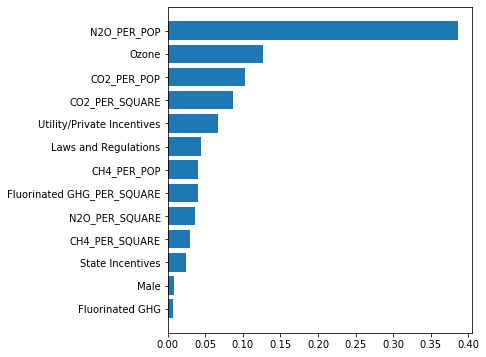

In [33]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data_q1_2.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

### 2. Mortality from heart failure

In [34]:
data_q2 = data[data['Question']=='Mortality from heart failure']

In [35]:
data_q2[data_q2['StratificationCategory1']=='Race/Ethnicity'].isnull().sum()

DataValue                     544
StratificationCategory1         0
Stratification1                 0
CO2_PER_POP                     0
CO2_PER_SQUARE                  0
CH4_PER_POP                     0
CH4_PER_SQUARE                  0
N2O_PER_POP                     0
N2O_PER_SQUARE                  0
Fluorinated GHG_PER_SQUARE      0
Fluorinated GHG                 0
Laws and Regulations            0
State Incentives                0
Utility/Private Incentives      0
Ozone                           0
Question                        0
dtype: int64

In [36]:
data_q2[data_q2['StratificationCategory1']=='Gender'].isnull().sum()

DataValue                     0
StratificationCategory1       0
Stratification1               0
CO2_PER_POP                   0
CO2_PER_SQUARE                0
CH4_PER_POP                   0
CH4_PER_SQUARE                0
N2O_PER_POP                   0
N2O_PER_SQUARE                0
Fluorinated GHG_PER_SQUARE    0
Fluorinated GHG               0
Laws and Regulations          0
State Incentives              0
Utility/Private Incentives    0
Ozone                         0
Question                      0
dtype: int64

In [37]:
data_q2_1 = data_q2[data_q2['StratificationCategory1']=='Race/Ethnicity']
data_q2_1.drop(['Question','StratificationCategory1'], axis=1, inplace=True)
data_q2_1 = data_q2_1[~data_q2_1['DataValue'].isnull()]

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [38]:
data_q2_1.head()

,DataValue,Stratification1,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
31,138.8,"White, non-Hispanic",17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
36,90.7,"Black, non-Hispanic",17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
108,90.6,"Black, non-Hispanic",17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
124,146.2,"White, non-Hispanic",17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
166,142.4,"White, non-Hispanic",17.523932,1618.606543,0.130945,12.094792,0.108513,10.022873,5.955761,312201,3,7,4,0.040936


In [39]:
data_q2_2 = data_q2[data_q2['StratificationCategory1']=='Gender']
data_q2_2.drop(['Question','StratificationCategory1'], axis=1, inplace=True)

In [40]:
data_q2_2.head()

,DataValue,Stratification1,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
20,124.4,Female,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
44,111.9,Male,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
105,125.8,Female,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
119,120.4,Male,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
178,117.2,Male,17.523932,1618.606543,0.130945,12.094792,0.108513,10.022873,5.955761,312201,3,7,4,0.040936


#### Label_encoding

In [41]:
data_q2_1.rename(columns={'Stratification1':'Race'}, inplace=True)
data_q2_1 = pd.get_dummies(data_q2_1, columns = ['Race'], drop_first = True)

In [42]:
data_q2_1.head()

,DataValue,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone,Race_Asian or Pacific Islander,"Race_Black, non-Hispanic",Race_Hispanic,"Race_White, non-Hispanic"
31,138.8,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215,0,0,0,1
36,90.7,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215,0,1,0,0
108,90.6,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733,0,1,0,0
124,146.2,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733,0,0,0,1
166,142.4,17.523932,1618.606543,0.130945,12.094792,0.108513,10.022873,5.955761,312201,3,7,4,0.040936,0,0,0,1


In [43]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_q2_2['Stratification1'] = label_encoder.fit_transform(data_q2_2['Stratification1'])
data_q2_2.rename(columns={'Stratification1':'Male'}, inplace=True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [44]:
data_q2_2.head()

,DataValue,Male,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
20,124.4,0,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
44,111.9,1,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
105,125.8,0,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
119,120.4,1,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
178,117.2,1,17.523932,1618.606543,0.130945,12.094792,0.108513,10.022873,5.955761,312201,3,7,4,0.040936


### Regression

### Race

In [45]:
X = data_q2_1.values[:,1:].copy()
y = data_q2_1.DataValue.values

#### Linear regression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

nmc = 100

#Linear Regression
linreg = LinearRegression()
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(linreg, X, y, cv=cvf,return_train_score=True)
print('---- linear regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- linear regression ----
0.824866717714557
0.8159832538294939


#### Random Forest Regression

In [47]:
#Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[5],'max_depth':[20],'n_estimators':[50]}
# set up cross-validation shuffles
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
# set up search
grid_search=GridSearchCV(RandomForestRegressor(random_state=25),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)

print('---- random forest ----')
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])
print('---- optimal parameters ----')
print(grid_search.best_params_)
print('---- best accuracy ----')
print(grid_search.best_score_)

---- random forest ----
   rank_test_score  mean_test_score param_max_features param_max_depth
0                1         0.960576                  5              20
---- optimal parameters ----
{'max_depth': 20, 'max_features': 5, 'n_estimators': 50}
---- best accuracy ----
0.9605764371240503


#### Gradient Boosting Regression

In [48]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.960
Accuracy on test set: 0.944


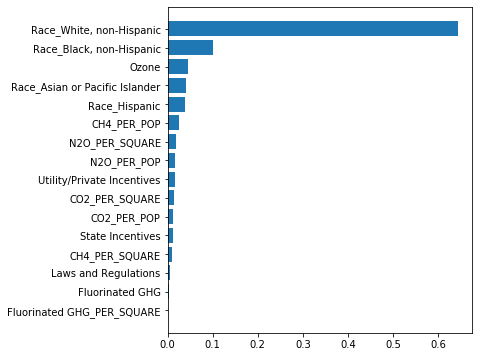

In [49]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data_q2_1.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

### Gender

In [50]:
X = data_q2_2.values[:,1:].copy()
y = data_q2_2.DataValue.values

#### Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

nmc = 100

#Linear Regression
linreg = LinearRegression()
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(linreg, X, y, cv=cvf,return_train_score=True)
print('---- linear regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- linear regression ----
0.2028659295386356
0.1350138169562075


#### Random forest regression

In [52]:
#Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[5],'max_depth':[25],'n_estimators':[50]}
# set up cross-validation shuffles
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
# set up search
grid_search=GridSearchCV(RandomForestRegressor(random_state=25),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)

print('---- random forest ----')
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])
print('---- optimal parameters ----')
print(grid_search.best_params_)
print('---- best accuracy ----')
print(grid_search.best_score_)

---- random forest ----
   rank_test_score  mean_test_score param_max_features param_max_depth
0                1         0.889835                  5              25
---- optimal parameters ----
{'max_depth': 25, 'max_features': 5, 'n_estimators': 50}
---- best accuracy ----
0.8898354532094301


#### Gradient Boosting Regression

In [53]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.928
Accuracy on test set: 0.837


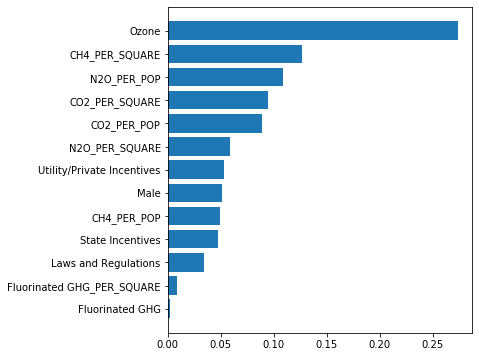

In [54]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data_q2_2.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

### 3. Mortality from coronary heart disease

In [55]:
data_q3 = data[data['Question']=='Mortality from coronary heart disease']

In [56]:
data_q3[data_q3['StratificationCategory1']=='Race/Ethnicity'].isnull().sum()

DataValue                     505
StratificationCategory1         0
Stratification1                 0
CO2_PER_POP                     0
CO2_PER_SQUARE                  0
CH4_PER_POP                     0
CH4_PER_SQUARE                  0
N2O_PER_POP                     0
N2O_PER_SQUARE                  0
Fluorinated GHG_PER_SQUARE      0
Fluorinated GHG                 0
Laws and Regulations            0
State Incentives                0
Utility/Private Incentives      0
Ozone                           0
Question                        0
dtype: int64

In [57]:
data_q3[data_q3['StratificationCategory1']=='Gender'].isnull().sum()

DataValue                     0
StratificationCategory1       0
Stratification1               0
CO2_PER_POP                   0
CO2_PER_SQUARE                0
CH4_PER_POP                   0
CH4_PER_SQUARE                0
N2O_PER_POP                   0
N2O_PER_SQUARE                0
Fluorinated GHG_PER_SQUARE    0
Fluorinated GHG               0
Laws and Regulations          0
State Incentives              0
Utility/Private Incentives    0
Ozone                         0
Question                      0
dtype: int64

In [58]:
data_q3_1 = data_q3[data_q3['StratificationCategory1']=='Race/Ethnicity']
data_q3_1.drop(['Question','StratificationCategory1'], axis=1, inplace=True)
data_q3_1 = data_q3_1[~data_q3_1['DataValue'].isnull()]

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [59]:
data_q3_1.head()

,DataValue,Stratification1,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
13,129.0,"White, non-Hispanic",17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
41,83.5,"Black, non-Hispanic",17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
101,82.4,"Black, non-Hispanic",17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
112,130.5,"White, non-Hispanic",17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
126,10.6,Hispanic,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733


In [60]:
data_q3_2 = data_q3[data_q3['StratificationCategory1']=='Gender']
data_q3_2.drop(['Question','StratificationCategory1'], axis=1, inplace=True)

In [61]:
data_q3_2.head()

,DataValue,Stratification1,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
12,127.0,Male,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
32,93.9,Female,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
96,91.2,Female,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
123,131.6,Male,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
137,88.1,Female,17.523932,1618.606543,0.130945,12.094792,0.108513,10.022873,5.955761,312201,3,7,4,0.040936


#### Label_encoding

In [62]:
data_q3_1.rename(columns={'Stratification1':'Race'}, inplace=True)
data_q3_1 = pd.get_dummies(data_q3_1, columns = ['Race'], drop_first = True)

In [63]:
data_q3_1.head()

,DataValue,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone,Race_Asian or Pacific Islander,"Race_Black, non-Hispanic",Race_Hispanic,"Race_White, non-Hispanic"
13,129.0,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215,0,0,0,1
41,83.5,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215,0,1,0,0
101,82.4,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733,0,1,0,0
112,130.5,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733,0,0,0,1
126,10.6,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733,0,0,1,0


In [64]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_q3_2['Stratification1'] = label_encoder.fit_transform(data_q3_2['Stratification1'])
data_q3_2.rename(columns={'Stratification1':'Male'}, inplace=True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [65]:
data_q3_2.head()

,DataValue,Male,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
12,127.0,1,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
32,93.9,0,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
96,91.2,0,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
123,131.6,1,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
137,88.1,0,17.523932,1618.606543,0.130945,12.094792,0.108513,10.022873,5.955761,312201,3,7,4,0.040936


### Regression

### Race

In [66]:
X = data_q3_1.values[:,1:].copy()
y = data_q3_1.DataValue.values

#### Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

nmc = 100

#Linear Regression
linreg = LinearRegression()
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(linreg, X, y, cv=cvf,return_train_score=True)
print('---- linear regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- linear regression ----
0.7400943295331516
0.7240462935937885


#### Random forest regression

In [68]:
#Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[5],'max_depth':[25],'n_estimators':[50]}
# set up cross-validation shuffles
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
# set up search
grid_search=GridSearchCV(RandomForestRegressor(random_state=25),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)

print('---- random forest ----')
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])
print('---- optimal parameters ----')
print(grid_search.best_params_)
print('---- best accuracy ----')
print(grid_search.best_score_)

---- random forest ----
   rank_test_score  mean_test_score param_max_features param_max_depth
0                1         0.941761                  5              25
---- optimal parameters ----
{'max_depth': 25, 'max_features': 5, 'n_estimators': 50}
---- best accuracy ----
0.9417613459438559


#### Gradient Boosting Regression

In [69]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.945
Accuracy on test set: 0.890


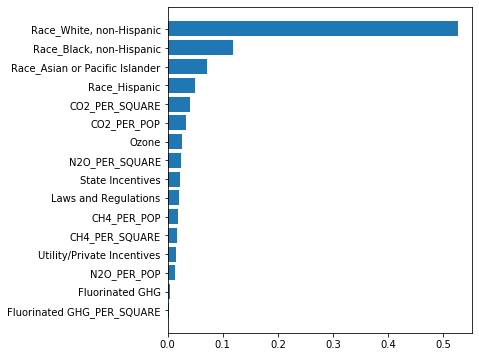

In [70]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data_q3_1.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

### Gender

In [71]:
X = data_q3_2.values[:,1:].copy()
y = data_q3_2.DataValue.values

#### Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

nmc = 100

#Linear Regression
linreg = LinearRegression()
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(linreg, X, y, cv=cvf,return_train_score=True)
print('---- linear regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- linear regression ----
0.5487172187887177
0.5116074339956505


#### Random forest regression

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[5],'max_depth':[25],'n_estimators':[50]}
# set up cross-validation shuffles
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
# set up search
grid_search=GridSearchCV(RandomForestRegressor(random_state=25),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)

print('---- random forest ----')
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])
print('---- optimal parameters ----')
print(grid_search.best_params_)
print('---- best accuracy ----')
print(grid_search.best_score_)

---- random forest ----
   rank_test_score  mean_test_score param_max_features param_max_depth
0                1         0.898508                  5              25
---- optimal parameters ----
{'max_depth': 25, 'max_features': 5, 'n_estimators': 50}
---- best accuracy ----
0.8985082475763129


#### Gradient Boosting Regression

In [74]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.960
Accuracy on test set: 0.841


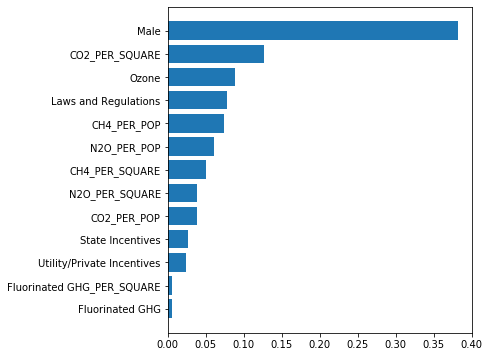

In [75]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data_q3_2.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()